In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from scipy.stats import anderson
from scipy.stats import shapiro
from fitter import Fitter, get_common_distributions, get_distributions

In [109]:
dataframe = pd.read_csv("train.csv")
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [110]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


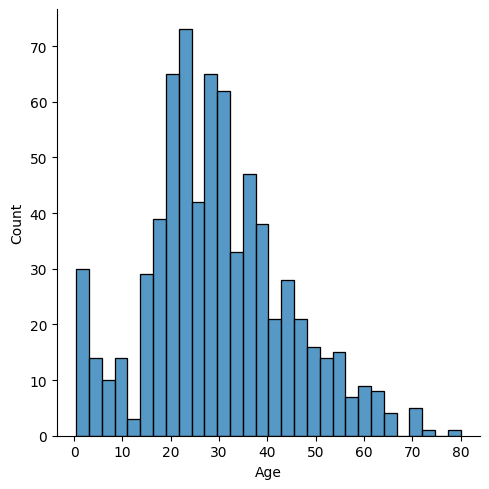

In [112]:
sb.displot(data=dataframe, x="Age", kind="hist", bins = 30, aspect = 1)

In [113]:
Y = dataframe["Age"].dropna()
X = Y.values
X

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [114]:
anderson(X)

AndersonResult(statistic=3.8230373853616584, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**The test statistic is 3.82303.**

**The critical value for α = 0.01 is 1.086.**

**The critical value for α = 0.025 is 0.913.**

**The critical value for α = 0.05 is 0.783.**

**The critical value for α = 0.1 is 0.652.**

**The critical value for α = 0.15 is 0.573.**

**Because the test statistic (3.82303) is greater than any critical value, the results are significant at a significance of any level, which means we would reject the null hypothesis of the test no matter which significance level we choose to use. We have sufficient evidence to say that the sample data is not normally distributed.**

In [115]:
stat, p = shapiro(X)
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
 print("Probably Gaussian")
else:
 print("Probably not Gaussian")

stat=0.981, p=0.000
Probably not Gaussian


**Both tests indicate our data is not normally distributed.**

Fitting 10 distributions: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.43it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.011183,997.757182,-7880.130272,inf,0.056286,0.020855
chi2,0.011215,998.614796,-7878.095589,inf,0.057456,0.017226
gamma,0.011215,998.614708,-7878.095568,inf,0.057456,0.017226
norm,0.011571,1025.691264,-7862.395007,inf,0.064561,0.004963
cauchy,0.011777,1027.107508,-7849.745954,inf,0.091760,0.000011


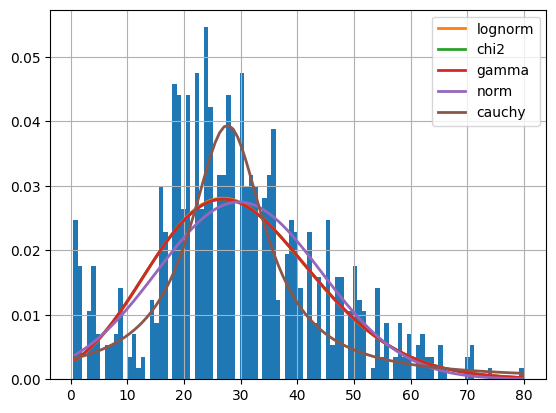

In [116]:
check = Fitter(Y,distributions=get_common_distributions())
check.fit()
check.summary()

In [117]:
check.get_best()

{'lognorm': {'s': 0.13424431904602424,
  'loc': -78.02671169181616,
  'scale': 106.78081758772217}}

**Fitter indicates our data has Log-normal distribution**

---

In [118]:
dataframe_filled = pd.DataFrame(dataframe)

In [119]:
dataframe_filled.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
dataframe_filled["Age"].fillna(dataframe_filled["Age"].dropna().mean(), inplace = True)
dataframe_filled.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
dataframe_filled["Cabin"] = np.where(dataframe_filled["Cabin"].isnull(), 0, 1)
dataframe_filled.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [122]:
dataframe_filled["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [123]:
dataframe_filled["Embarked"].fillna("S", inplace = True)
dataframe_filled.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [124]:
dataframe_filled

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C


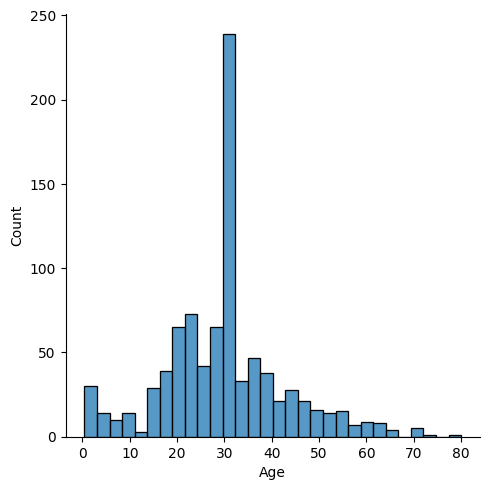

In [125]:
sb.displot(data=dataframe_filled, x="Age", kind="hist", bins = 30, aspect = 1)

In [126]:
stat, p = shapiro(dataframe_filled["Age"])
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
 print("Probably Gaussian")
else:
 print("Probably not Gaussian")

stat=0.959, p=0.000
Probably not Gaussian


Fitting 10 distributions: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.64it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.048821,1065.469184,-8728.857010,inf,0.112071,3.336266e-10
lognorm,0.055393,1044.439861,-8609.532933,inf,0.126121,8.189295e-13
gamma,0.055481,1045.962199,-8608.120716,inf,0.129849,1.473505e-13
chi2,0.055531,1041.553443,-8607.313395,inf,0.125502,1.083676e-12
norm,0.055791,1078.621089,-8609.945022,inf,0.148452,1.324767e-17


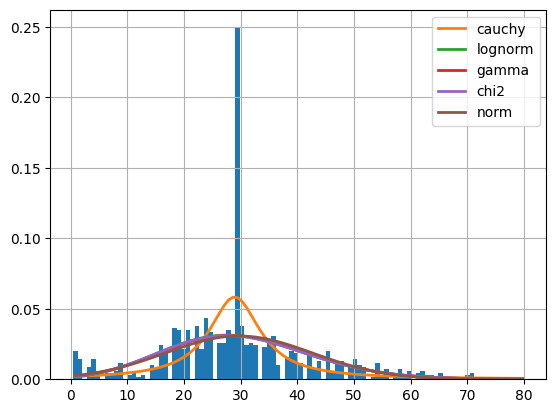

In [127]:
check_filled = Fitter(dataframe_filled["Age"],distributions=get_common_distributions())
check_filled.fit()
check_filled.summary()

In [128]:
check_filled.get_best()

{'cauchy': {'loc': 28.957490401207295, 'scale': 5.450377975953893}}

**Filling our Age with mean data did not affect our distribution much in term of normal distribution, as it was already not normally distributed, but Cauchy distribution score topped Log-normal distribution by 0.0065 std (0.055393 - 0.048821). The Cabin was filled with indicators, wheteher we had data or not in original dataset and the Embarked was filled with most popular value.** 	